# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing helpers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score , roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

#Classical classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Datasets

In [3]:
# Load Full Dataset

train = pd.read_csv('drive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv('drive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_test.csv')

df_train = train.copy()
df_test = test.copy()

print("Original Shape of Train Dataset:", df_train.shape[0], 'X' , df_train.shape[1])
print("Original Shape of Test Dataset:", df_test.shape[0], 'X' , df_test.shape[1])

# Seperate ID numbers and target features from train and test dataset

train_feat = df_train.iloc[:, 1:]
train_lab = df_train.label

test_feat = df_test.iloc[:, 1:]
test_lab = df_test.label


print("\nTrain Features:", train_feat.shape[0], 'X' , train_feat.shape[1], '\nTrain Labels:' , train_lab.shape[0], 'X 1')

print("\nTest Features:", test_feat.shape[0], 'X' , test_feat.shape[1], '\nTest Labels:' , test_lab.shape[0], 'X 1')




Original Shape of Train Dataset: 60000 X 785
Original Shape of Test Dataset: 10000 X 785

Train Features: 60000 X 784 
Train Labels: 60000 X 1

Test Features: 10000 X 784 
Test Labels: 10000 X 1


# Data Preprocessing

## Normalize the dataset

* Data samples need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we also acheive Zero Mean and Unit Variance.

* Normalization is carried out as follows: 
> x = (x - min) / (max - min) ; Here min= 0 and max= 255

In [0]:
# Normalize Full Train and Test Feature data

train_feat = train_feat.astype("float32")/255

test_feat = test_feat.astype("float32")/255

## Dimensionality Reduction using PCA

* We will use Principal Component analysis as a Dimensionality reduction technique to reduce the no. of features. <br>
* It is helpful to use a Dimensionality reduction technique before applying the data to (classical/ non-CNN based) machine learning algorithms as it significantly reduces computational cost and time.

In [5]:
# Apply PCA to train and test data

pca = PCA().fit(train_feat)

# PCA Transform on whole Train and Test Data 
train_pca = pca.transform(train_feat)
test_pca = pca.transform(test_feat)

# Select only first 15 pca components
train_pca = train_pca[:, :20]
test_pca = test_pca[:, :20]

# Convert to Dataframes
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

print("\nShape of PCA transformed Train Data: " , train_pca.shape[0], "X" ,  train_pca.shape[1] )
print("Shape of PCA transformed Test Data: " , test_pca.shape[0], "X" ,  test_pca.shape[1])



Shape of PCA transformed Train Data:  60000 X 20
Shape of PCA transformed Test Data:  10000 X 20


## Truncate the Train Data for using GridSearchCV and Apply PCA

In [6]:

trunc_feat = train_pca[0:10000]

print("Shape of Truncated Training data for using GridSearchCV is: ", trunc_feat.shape[0], "X" ,  trunc_feat.shape[1])

trunc_lab =  train_lab[:10000]

print("Shape of Truncated Training Labels is: ", trunc_lab.shape[0], "X 1" )


Shape of Truncated Training data for using GridSearchCV is:  10000 X 20
Shape of Truncated Training Labels is:  10000 X 1


## Split Train Data into Train and Validation Datasets

In [0]:
x_train, x_val, y_train, y_val = train_test_split(train_pca, train_lab, test_size=0.2, random_state=42)

# Classification Models

## 1. Support Vector Machine Classifier

In [8]:
# Implement SVC for C=50 on Full Train Data

svm_clf = SVC(C=50, kernel='rbf', random_state=42)

print("\n Applying SVM Classifier ... \n")

start = time.time()
svm_clf.fit(train_pca, train_lab)
end = time.time()

print("\n Finished applying SVM Classifier ... \n")

svm_runtime = (end - start)/60

svm_preds = svm_clf.predict(test_pca) 
svm_test_score = accuracy_score(test_lab, svm_preds)

print("\nThe accuracy of SVM classifier on test data is:", svm_test_score*100 , "%")
print("SVM Classifier Training Runtime: ", svm_runtime , 'mins' )



 Applying SVM Classifier ... 


 Finished applying SVM Classifier ... 


The accuracy of SVM classifier on test data is: 88.14 %
SVM Classifier Training Runtime:  0.9278814196586609 mins


## 2. K-Nearest Neighbors Classifier

In [9]:
# Implement KNN on Full Train Data

knn_clf = KNeighborsClassifier(n_neighbors=5, weights= 'distance', metric='euclidean')

print("\nApplying KNN Classifier ... \n")

start = time.time()
knn_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying KNN Classifier ... \n")

knn_runtime = (end - start)/60

knn_preds = knn_clf.predict(test_pca) 
knn_test_score = accuracy_score(test_lab, knn_preds)

print("\nThe accuracy of KNN classifier on test data is:", knn_test_score*100 , "%")
print("KNN Classifier Training Runtime: ", knn_runtime , 'mins' )



Applying KNN Classifier ... 

Finished applying KNN Classifier ... 


The accuracy of KNN classifier on test data is: 85.0 %
KNN Classifier Training Runtime:  0.003636455535888672 mins


## 3. Gaussian Naive Bayes Classifier

In [10]:
# Implement Gaussian Naive Bayes Classifier on Full Train Data

gnb_clf = GaussianNB()

print("\nApplying Gaussian Naive Bayes Classifier Classifier ... \n")

start = time.time()
gnb_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying Gaussian Naive Bayes Classifier Classifier ... \n")

gnb_runtime = (end - start)/60

gnb_preds = gnb_clf.predict(test_pca) 
gnb_test_score = accuracy_score(test_lab, gnb_preds)

print("\nThe accuracy of Gaussian Naive Bayes Classifier classifier on test data is:", gnb_test_score*100 , "%")
print("Gaussian Naive Bayes Classifier Classifier Training Runtime: ", gnb_runtime , 'mins' )



Applying Gaussian Naive Bayes Classifier Classifier ... 

Finished applying Gaussian Naive Bayes Classifier Classifier ... 


The accuracy of Gaussian Naive Bayes Classifier classifier on test data is: 74.64 %
Gaussian Naive Bayes Classifier Classifier Training Runtime:  0.0005635261535644531 mins


## 4. Decision Tree Classifier

In [14]:
# Implement Decision Trees Classifier on Full Train Data

dt_clf = DecisionTreeClassifier(criterion= 'entropy', max_depth=100, random_state=42)

print("\nApplying Decision Trees Classifier ... \n")

start = time.time()
dt_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying Decision Trees Classifier ... \n")

dt_runtime = (end - start)/60

dt_preds = dt_clf.predict(test_pca) 
dt_test_score = accuracy_score(test_lab, dt_preds)

print("\nThe accuracy of Decision Trees Classifier on test data is:", dt_test_score*100 , "%")
print("Decision Trees Classifier Training Runtime: ", dt_runtime , 'mins' )



Applying Decision Trees Classifier ... 

Finished applying Decision Trees Classifier ... 


The accuracy of Decision Trees Classifier on test data is: 78.10000000000001 %
Decision Trees Classifier Training Runtime:  0.11626642942428589 mins


## 5. Random Forest Classifier

In [15]:
# Implement Random Forest Classifier on Full Train Data

rf_clf = RandomForestClassifier(n_estimators= 700 , criterion='entropy', random_state= 42)

print("\nApplying Random Forest Classifier  ... \n")

start = time.time()
rf_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying Random Forest Classifier ... \n")

rf_runtime = (end - start)/60

rf_preds = rf_clf.predict(test_pca) 
rf_test_score = accuracy_score(test_lab, rf_preds)

print("\nThe accuracy of Random Forest Classifier on test data is:", rf_test_score*100 , "%")
print("Random Forest Classifier Training Runtime: ", rf_runtime , 'mins' )



Applying Random Forest Classifier  ... 

Finished applying Random Forest Classifier ... 


The accuracy of Random Forest Classifier on test data is: 85.99 %
Random Forest Classifier Training Runtime:  11.32150129477183 mins


## 6. XGBoost Classifier

In [16]:
# Implement XGBoost Classifier on Full Train Data

xgb_clf = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)

print("\nApplying XGBoost Classifier ... \n")

start = time.time()
xgb_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying XGBoost Classifier ... \n")

xgb_runtime = (end - start)/60

xgb_preds = xgb_clf.predict(test_pca) 
xgb_test_score = accuracy_score(test_lab, xgb_preds)

print("\nThe accuracy of XGBoost classifier on test data is:", xgb_test_score*100 , "%")
print("XGBoost Classifier Training Runtime: ", xgb_runtime , 'mins' )



Applying XGBoost Classifier ... 

Finished applying XGBoost Classifier ... 


The accuracy of XGBoost classifier on test data is: 87.38 %
XGBoost Classifier Training Runtime:  27.76707145770391 mins


## 7. Ensemble Method: Boosting

In [21]:
cart = RandomForestClassifier(n_estimators=550, criterion= 'entropy', random_state=42)

adb_clf = AdaBoostClassifier(base_estimator=cart, n_estimators=100, learning_rate=0.1, random_state=42)

print("\n Applying AdaBoost Classifier ... \n")

start = time.time()
adb_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying AdaBoost Classifier ... \n")

adb_runtime = (end - start)/60

adb_preds = adb_clf.predict(test_pca) 
adb_test_score = accuracy_score(test_lab, adb_preds)

print("\nThe accuracy of AdaBoost classifier on test data is:", adb_test_score*100 , "%")
print("AdaBoost Classifier Training Runtime: ", adb_runtime , 'mins' )



 Applying AdaBoost Classifier ... 

Finished applying AdaBoost Classifier ... 


The accuracy of AdaBoost classifier on test data is: 86.04 %
AdaBoost Classifier Training Runtime:  9.791364550590515 mins


## 8. Ensemble Method: Stacking

In [18]:
# Implement Stacking on Full Train Data

clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = KNeighborsClassifier(n_neighbors=5, weights= 'distance', metric='euclidean')

est = [('rf', clf2), ('svc', clf3), ('knn', clf4)]

stk_clf = StackingClassifier(estimators= est, final_estimator= clf1)

print("\n Applying Stacking Classifier ... \n")
start = time.time()
stk_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying Stacking Classifier ... \n")

stk_runtime = (end - start)/60

stk_preds = stk_clf.predict(test_pca) 
stk_test_score = accuracy_score(test_lab, stk_preds)

print("\nThe accuracy of Stacking classifier on test data is:", stk_test_score*100 , "%")
print("Stacking Classifier Training Runtime: ", stk_runtime , 'mins' )


 Applying Stacking Classifier ... 

Finished applying Stacking Classifier ... 


The accuracy of Stacking classifier on test data is: 88.23 %
Stacking Classifier Training Runtime:  86.37817047039668 mins


## 9. Ensemble Method: Voting

In [19]:
# Implement Voting on Full Train Data

clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 550, random_state=42)
clf2 = RandomForestClassifier(n_estimators=700, random_state=42, criterion='entropy')
clf3 = SVC(kernel = 'rbf', C=50, random_state= 42)
clf4 = KNeighborsClassifier(n_neighbors=5, weights= 'distance', metric='euclidean')
clf5 = ExtraTreesClassifier(n_estimators=550, criterion='entropy', random_state=42)


est = [('xgb', clf1), ('rf', clf2), ('svc', clf3), ('knn', clf4), ('ext', clf5)]

vot_clf = VotingClassifier(estimators= est, voting='hard', flatten_transform=True, weights= [1,1,1,1,1])

print("\n Applying Voting Classifier ... \n")
start = time.time()
vot_clf.fit(train_pca, train_lab)
end = time.time()

print("Finished applying Voting Classifier ... \n")

vot_runtime = (end - start)/60

vot_preds = vot_clf.predict(test_pca) 
vot_test_score = accuracy_score(test_lab, vot_preds)

print("\nThe accuracy of Voting classifier on test data is:", vot_test_score*100 , "%")
print("Voting Classifier Training Runtime: ", vot_runtime , 'mins' )


 Applying Voting Classifier ... 

Finished applying Voting Classifier ... 


The accuracy of Voting classifier on test data is: 86.65 %
Voting Classifier Training Runtime:  41.792180919647215 mins


# Comparison Plots

In [0]:
classifiers = ['SVM', "KNN", 'Gaussian NB', 'Decision Trees', 'Random Forest', 'XGBoost', 'AdaBoost', 'Stacking', 'Voting']

runtimes = [svm_runtime, knn_runtime, gnb_runtime, dt_runtime, rf_runtime, xgb_runtime, adb_runtime, stk_runtime, vot_runtime]

scores = [svm_test_score, knn_test_score, gnb_test_score, dt_test_score, rf_test_score, xgb_test_score, adb_test_score, stk_test_score, vot_test_score]



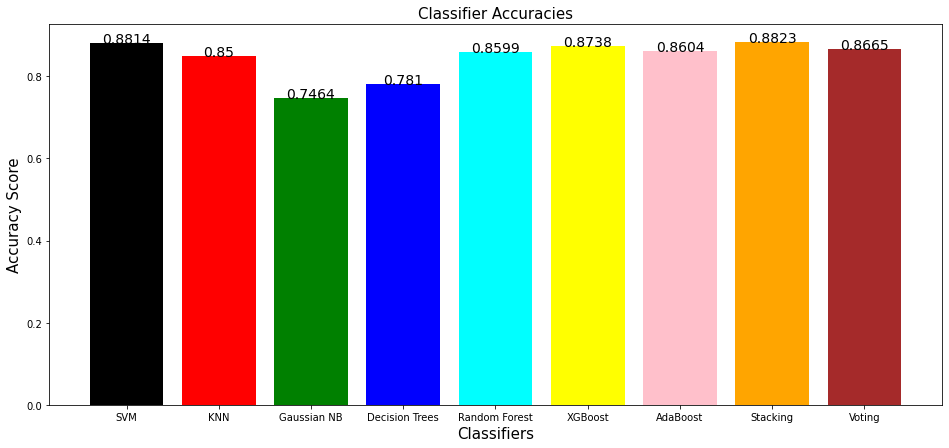

In [18]:
plt.figure(figsize=(16,7))
colors= ['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'pink', 'orange', 'brown']
plt.bar(classifiers, scores, color=colors)
plt.xlabel("Classifiers", fontsize= '15')
plt.ylabel("Accuracy Score", fontsize= '15')
plt.title("Classifier Accuracies", fontsize=15)

for i in range(len(scores)):
    plt.text( classifiers[i], scores[i], str(scores[i]), ha="center", size=14)

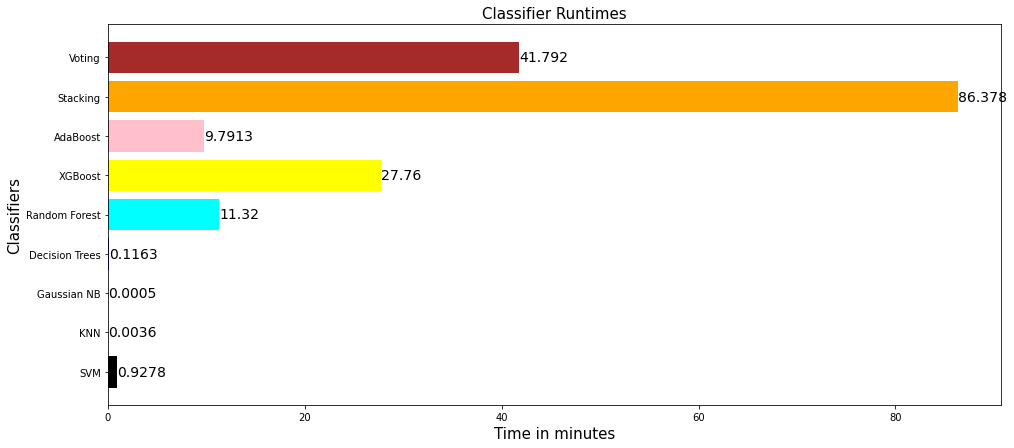

In [22]:
plt.figure(figsize=(16,7))
colors= ['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'pink', 'orange', 'brown']
plt.barh(classifiers, runtimes, color=colors)
plt.xlabel("Time in minutes", fontsize= '15')
plt.ylabel("Classifiers", fontsize= '15')
plt.title("Classifier Runtimes", fontsize=15)

for i in range(len(scores)):
    plt.text( runtimes[i], classifiers[i], str(runtimes[i]), va="center", size=14)